In [15]:
from gateway import Gateway

def handle_exception(e):
    logger.exception('internal server error %s', e)
    return 'internal server error', 500

def handler(json_input, dicom_instances, input_hash):
    logger = tagged_logger.TaggedLogger(logger)
    logger.add_tags({ 'input_hash': input_digest })
    logger.info('mock_model received json_input={}'.format(json_input))

    dcm = pydicom.read_file(dicom_instances[0])
    response_json = {
        'protocol_version': '1.0',
        'parts': [],
        'bounding_boxes_2d': [
            {
                'label': 'super bbox',
                'SOPInstanceUID': dcm.SOPInstanceUID,
                'top_left': [5, 5],
                'bottom_right': [10, 10]
            }
        ]
    }
    return response_json, []

if __name__ == '__main__':
    app = Gateway(__name__)
    app.register_error_handler(Exception, handle_exception)
    app.add_inference_route('/', handler)
    app.run(host='0.0.0.0', port=8005, debug=True, use_reloader=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:8005/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Users/cnmc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
!pwd

/Users/cnmc/Desktop/inference-sdk


In [23]:
from coviddetector import model
import tensorflow as tf
size=(224,224,3)
base_model = model.build_model(image_size=size, redux=1.0)


metrics = [tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.TruePositives(name='tp'),
           tf.keras.metrics.FalseNegatives(name='fn'),
           tf.keras.metrics.FalsePositives(name='fp'),'accuracy',tf.keras.metrics.AUC(name='auc')]
           
#optimizer=Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
base_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=metrics)


In [24]:
base_model.load_weights('/Users/cnmc/Desktop/inference-sdk/coviddetector/models/covid19_test_9_9_985_988.h5')

ValueError: You are trying to load a weight file containing 34 layers into a model with 33 layers.

In [1]:
import pydicom
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

/Users/cnmc/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/cnmc/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


image-0000008.dcm


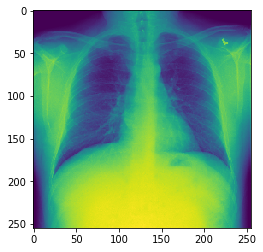

image-0000009.dcm


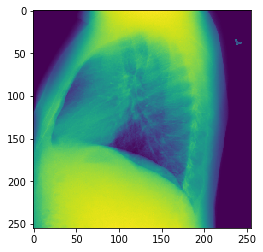

image-0000007.dcm


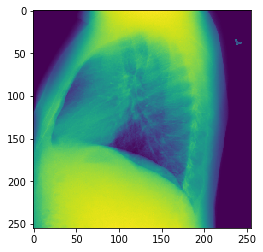

image-0000006.dcm


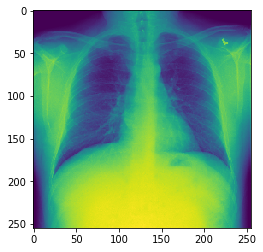

image-0000004.dcm


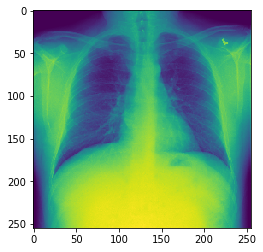

image-0000005.dcm


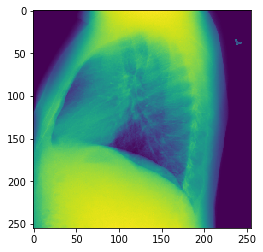

image-0000001.dcm


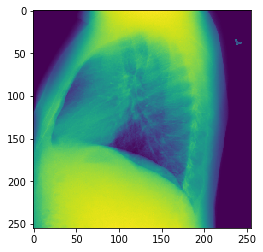

image-0000002.dcm


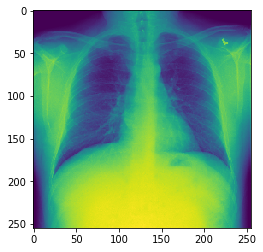

image-00000010.dcm


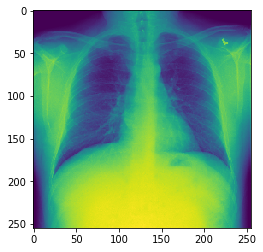

image-0000003.dcm


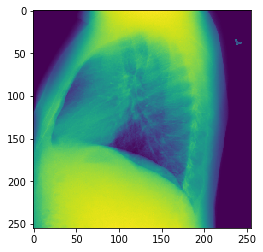

In [3]:
for i in os.listdir('./test-dcm/'):
    print(i)
    dataset = pydicom.read_file(os.path.join('./test-dcm/', i)).pixel_array
    plt.imshow(cv2.resize(dataset.astype('uint16'), (255,255)))
    plt.show()
    img = np.reshape(cv2.resize(dataset.astype('uint16'), (224, 224)), (1,224,224))
    dim = np.zeros((1,224,224))
    img = np.stack((img,dim,dim), axis=3)

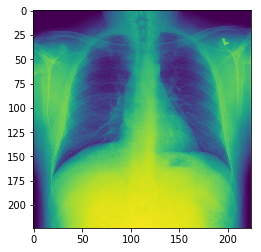

In [24]:
dataset = pydicom.read_file(os.path.join('./test-dcm/image-0000008.dcm')).pixel_array
img = np.reshape(cv2.resize(dataset.astype('uint16'), (224, 224)), (224,224))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


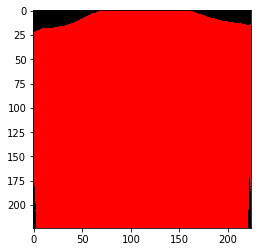

In [29]:
dataset = pydicom.read_file(os.path.join('./test-dcm/image-0000008.dcm')).pixel_array
img = np.reshape(cv2.resize(dataset.astype('uint16'), (224, 224)), (1,224,224))
dim = np.zeros((1,224,224))
img = np.stack((img,dim,dim), axis=3)
plt.imshow(img[0])

In [70]:
dataset = pydicom.read_file(os.path.join('./test-dcm/IM-0004-0003-0001.dcm'))
dataset.
# img = (dataset-np.min(dataset))/(np.max(dataset)-np.min(dataset))
# stacked=np.array(np.stack((np.array(img),)*3, axis=2))
# stacked=cv2.resize(stacked, (224,224))
# plt.imshow(stacked)

(0008, 0000) Group Length                        UL: 458
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20200306'
(0008, 0013) Instance Creation Time              TM: '115539'
(0008, 0014) Instance Creator UID                UI: ''
(0008, 0016) SOP Class UID                       UI: X-Ray Radiation Dose SR Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.452.3.134878770.758.1583442962.8
(0008, 0020) Study Date                          DA: '20200306'
(0008, 0023) Content Date                        DA: '20200306'
(0008, 0030) Study Time                          TM: '115201'
(0008, 0033) Content Time                        TM: '115201'
(0008, 0050) Accession Number                    SH: 'A10159987242'
(0008, 0060) Modality                            CS: 'SR'
(0008, 0070) Manufacturer                        LO: 'GE Medical Systems'
(0008, 0080) Institution Name                    LO: '0

In [66]:
stacked.shape

(224, 224, 3)

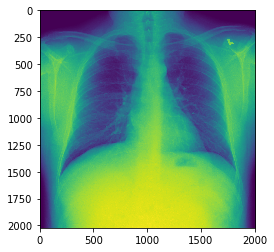

In [41]:
plt.imshow(dataset-np.min(dataset)*(255/np.max(dataset)-np.min(dataset)))